In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import normalize
%matplotlib inline

In [0]:
path = "/content/drive/My Drive/PROJECT 1001/processed_dataset.csv"
df = pd.read_csv(path)
df = df.drop(columns='Unnamed: 0')
#(df<0).any()

In [0]:
X = df.drop(columns = ['ARR_DEL15', 'ARR_DELAY', 'TIME_ARR_DELAY']) # independent columns and negative columns
y = df['ARR_DEL15']   # target column

##**Univariate Feature Selection; chi-square based**

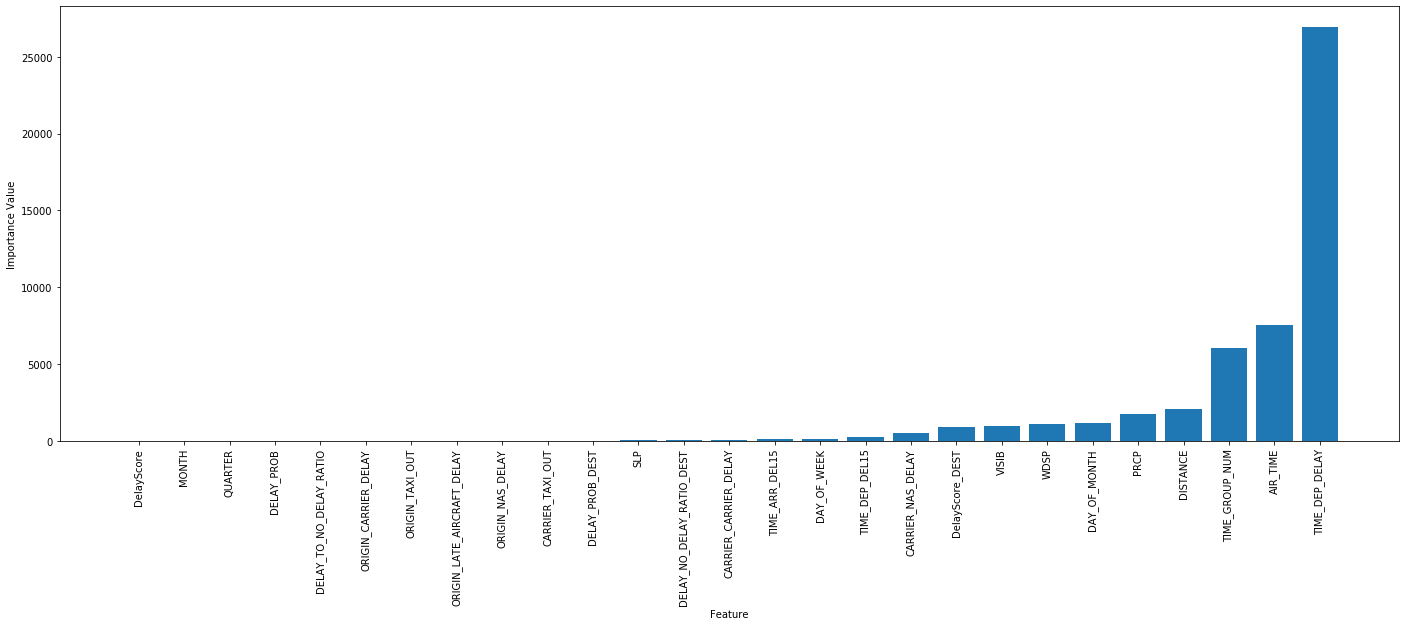

In [0]:
#apply SelectKBest class to extract top n best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(30,'Score'))
feature_importances, feature_names = (list(t) for t in zip(*sorted(zip(featureScores.Score, featureScores.Specs))))

# Plot bar chart
plt.figure(figsize=(24,8))
plt.bar(np.arange(len(feature_importances)), feature_importances, align='center')
plt.xticks(np.arange(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Value')

plt.show()

##**Univariate Feature Selection; mutual information based**

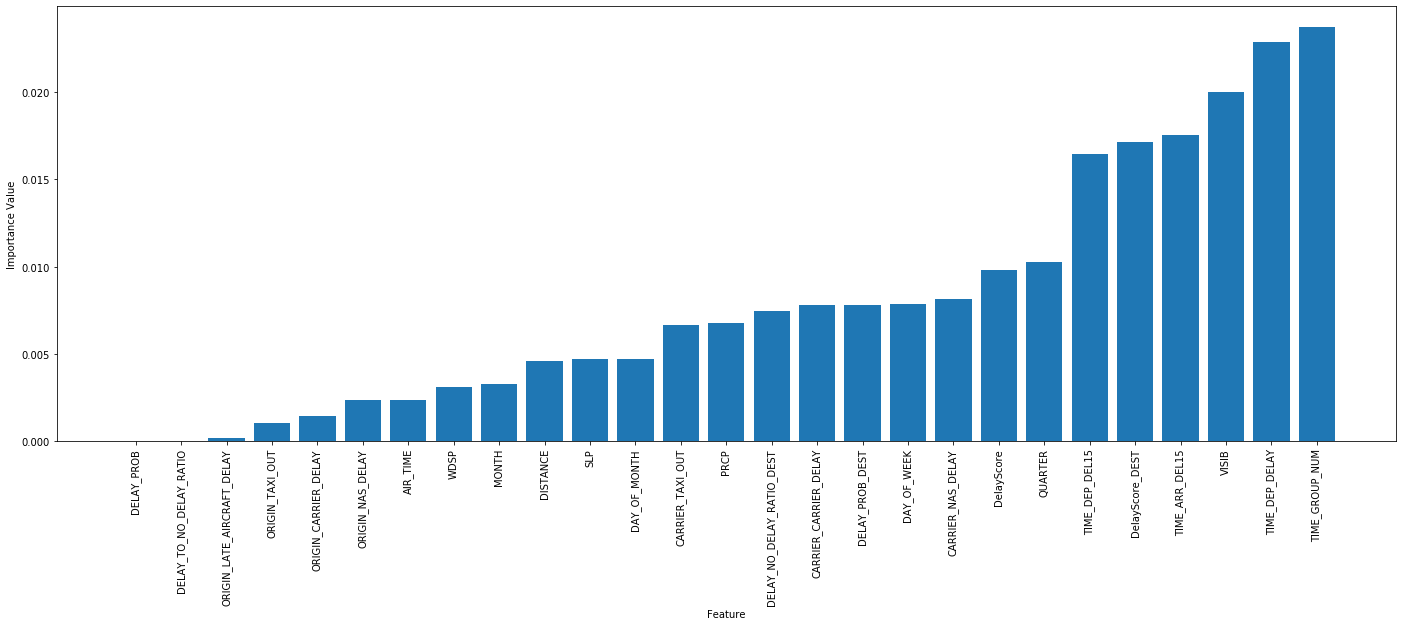

In [0]:
#apply SelectKBest class to extract top n best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(30,'Score'))
feature_importances, feature_names = (list(t) for t in zip(*sorted(zip(featureScores.Score, featureScores.Specs))))
# Plot bar chart
plt.figure(figsize=(24,8))
plt.bar(np.arange(len(feature_importances)), feature_importances, align='center')
plt.xticks(np.arange(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Value')
plt.show()